In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import h5py
from matplotlib import pyplot as plt, cm
from matplotlib import colors
from scipy.stats import pearsonr


In [24]:
csv_path = '/datax/scratch/calebp/cappuccino_runs/target_HIP62207_date_57543_node_spliced_sig_10_pearsonthreshold_7_blocksize_2048_edge_50.csv'
table = pd.read_csv(csv_path)
print(table)

      Target    Frequency  Block Index  \
0   HIP62207  1449.976094        82019   
1   HIP62207  1746.748502        30914   
2   HIP62207  1912.471836         2376   
3   HIP62207  1662.475707        45426   
4   HIP62207  1899.969126         4529   
5   HIP62207  1102.925719       141782   
6   HIP62207  1649.972997        47579   
7   HIP62207  1126.572275       137710   
8   HIP62207  1148.923846       133861   
9   HIP62207  1849.969900        13139   
10  HIP62207  1123.442242       138249   
11  HIP62207  1824.970287        17444   
12  HIP62207  1646.523573        48173   
13  HIP62207  1431.759187        85156   
14  HIP62207  1442.873997        83242   
15  HIP62207  1145.410543       134466   
16  HIP62207  1787.473771        23901   
17  HIP62207  1727.933462        34154   
18  HIP62207  1501.572275        73134   
19  HIP62207  1774.971061        26054   
20  HIP62207  1499.946284        73414   
21  HIP62207  1487.478417        75561   
22  HIP62207  1724.971836        3

In [25]:
all_file_names = table["All Files"]
all_file_names = [eval(i) for i in all_file_names]

In [37]:
indexes = table["Block Index"]
fch1 = float(table["Start Freq"][0])
foff = float(table["Bin Freq"][0])


block_size = int(csv_path.split(".")[-2].split("_")[-3])

In [17]:
loc = 0

file_ON = all_file_names[loc][0]
file_OFF = all_file_names[loc][1]
file3 = all_file_names[loc][2]
file4 = all_file_names[loc][3]
file5 = all_file_names[loc][4]
file6 = all_file_names[loc][5]


hf_ON = h5py.File(file_ON, 'r')
hf_OFF = h5py.File(file_OFF, 'r')
hf_ON2 = h5py.File(file3, 'r')
hf_OFF2 = h5py.File(file4, 'r')
hf_ON3 = h5py.File(file5, 'r')
hf_OFF3 = h5py.File(file6, 'r')

1449.9760940597125
82019
167974912 167976960


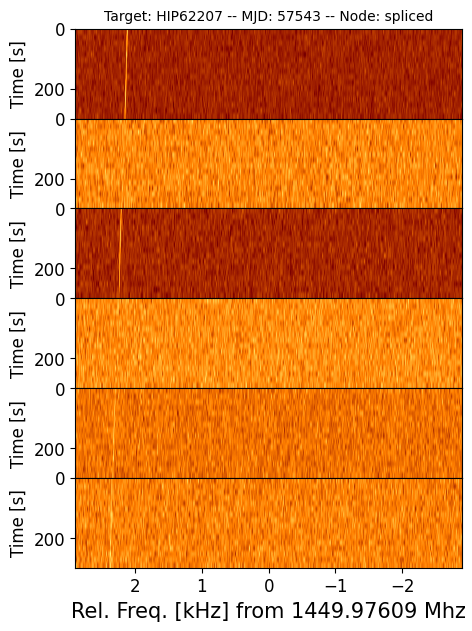

1746.7485017653617
30914
63311872 63313920


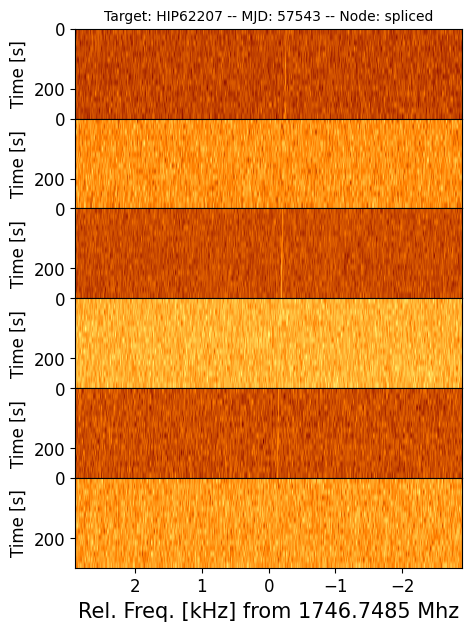

1912.4718355116452
2376
4866048 4868096


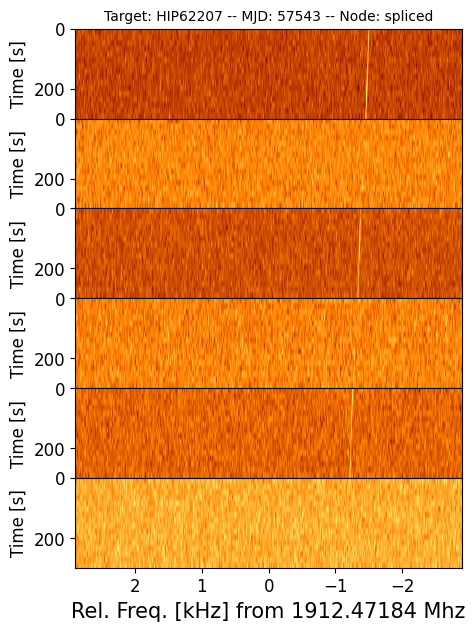

1662.475706918979
45426
93032448 93034496


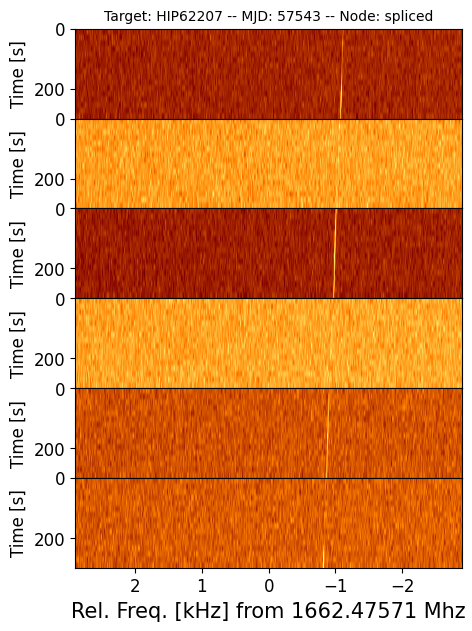

1899.9691255265113
4529
9275392 9277440


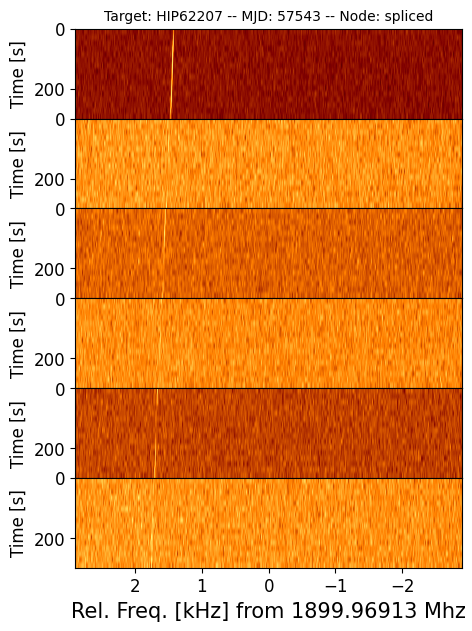

1102.9257193074827
141782
290369536 290371584


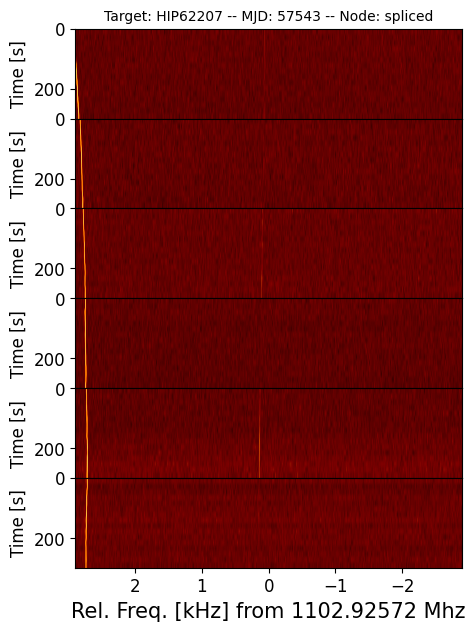

1649.9729969338455
47579
97441792 97443840


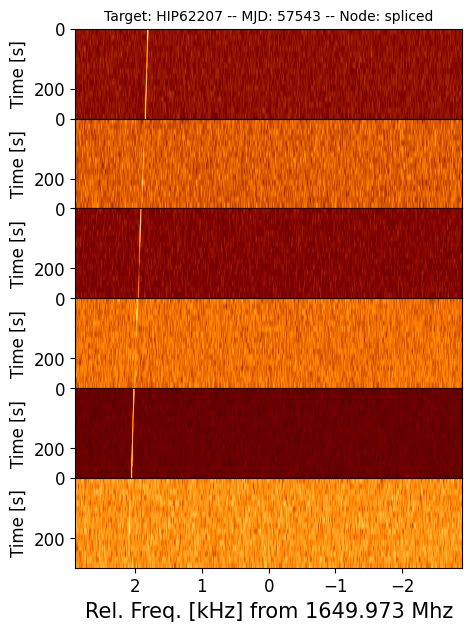

1126.5722753035184
137710
282030080 282032128


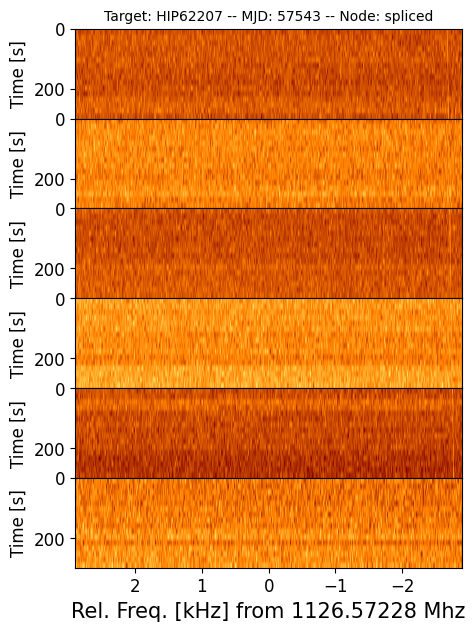

1148.9238455463328
133861
274147328 274149376


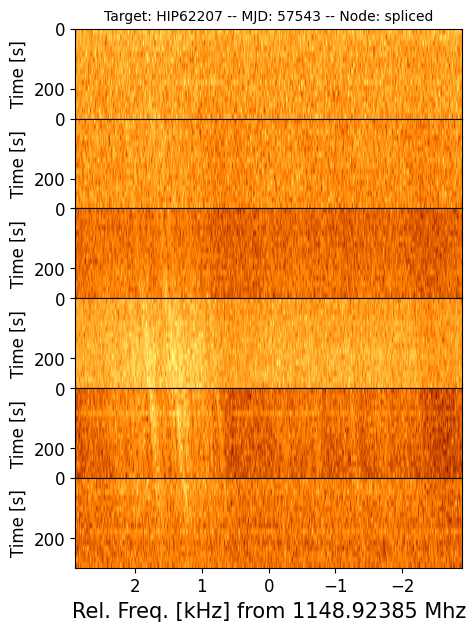

1849.9698998079782
13139
26908672 26910720


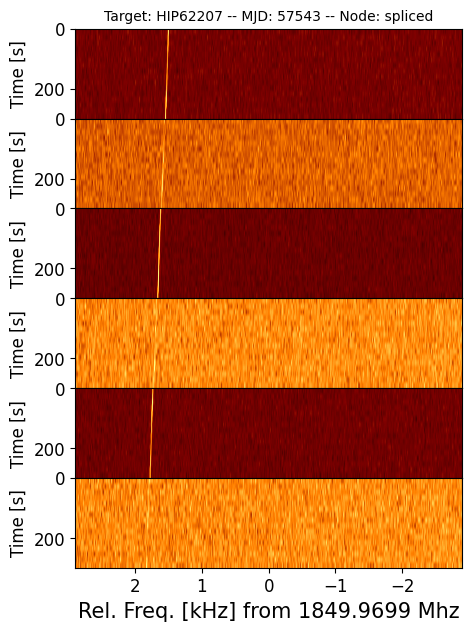

In [47]:
for i in indexes[0:10]:
    print(fch1+foff*(i*block_size))
    print(i)
    lower = (i) * block_size
    upper = (i+1) * block_size
    print(lower,upper)
    lower = int(lower)
    upper = int(upper)
    plot_candidates_sparse(hf_ON,hf_OFF,hf_ON2,hf_OFF2,hf_ON3,hf_OFF3,lower,upper,file_ON,foff,fch1)


In [44]:
def plot_candidates_sparse(hf1,hf2,hf3,hf4,hf5,hf6,lower,upper,file_ON,foff,fch1):
    obs1 = np.squeeze(hf1['data'][:,:,lower:upper],axis=1)
    obs2 = np.squeeze(hf2['data'][:,:,lower:upper],axis=1)
    obs3 = np.squeeze(hf3['data'][:,:,lower:upper],axis=1)
    obs4 = np.squeeze(hf4['data'][:,:,lower:upper],axis=1)
    obs5 = np.squeeze(hf5['data'][:,:,lower:upper],axis=1)
    obs6 = np.squeeze(hf6['data'][:,:,lower:upper],axis=1)


    cadence_max = np.max([np.max(obs1),np.max(obs2),np.max(obs3),np.max(obs4),np.max(obs5),np.max(obs6)])
    
    obs1_values = (obs1/cadence_max).flatten()
    obs2_values = (obs2/cadence_max).flatten()
    obs3_values = (obs3/cadence_max).flatten()
    obs4_values = (obs4/cadence_max).flatten()
    obs5_values = (obs5/cadence_max).flatten()
    obs6_values = (obs6/cadence_max).flatten()
    obs1 = obs1/np.max(obs1)
    obs2 = obs2/np.max(obs2)
    obs3 = obs3/np.max(obs3)
    obs4 = obs4/np.max(obs4)
    obs5 = obs5/np.max(obs5)
    obs6 = obs6/np.max(obs6)



    full_cadence = np.squeeze([np.concatenate((obs1,obs2,obs3,obs4,obs5,obs6))])


    # plot the waterfall
    fig, axs = plt.subplots(6,figsize=(5, 7))
    axs[0].imshow(obs1,aspect='auto',extent=[-((block_size/2)*foff*10**3),((block_size/2)*foff*10**3),299,0],norm=colors.LogNorm(),cmap='afmhot')
    axs[1].imshow(obs2,aspect='auto',extent=[-((block_size/2)*foff*10**3),((block_size/2)*foff*10**3),299,0],norm=colors.LogNorm(),cmap='afmhot')
    axs[2].imshow(obs3,aspect='auto',extent=[-((block_size/2)*foff*10**3),((block_size/2)*foff*10**3),299,0],norm=colors.LogNorm(),cmap='afmhot')
    axs[3].imshow(obs4,aspect='auto',extent=[-((block_size/2)*foff*10**3),((block_size/2)*foff*10**3),299,0],norm=colors.LogNorm(),cmap='afmhot')
    axs[4].imshow(obs5,aspect='auto',extent=[-((block_size/2)*foff*10**3),((block_size/2)*foff*10**3),299,0],norm=colors.LogNorm(),cmap='afmhot')
    axs[5].imshow(obs6,aspect='auto',extent=[-((block_size/2)*foff*10**3),((block_size/2)*foff*10**3),299,0],norm=colors.LogNorm(),cmap='afmhot')
    plt.subplots_adjust(hspace=0)
    center_freq = fch1+foff*(lower)    
    name = file_ON.split('/')[-1]

    target = name.split("_")[-2]
    obs_num = name.split("_")[-1]
    MJD = name.split("_")[3]
    node = name.split("_")[0]

    axs[0].tick_params(axis='y', labelsize=12)
    axs[1].tick_params(axis='y', labelsize=12)
    axs[2].tick_params(axis='y', labelsize=12)
    axs[3].tick_params(axis='y', labelsize=12)
    axs[4].tick_params(axis='y', labelsize=12)
    axs[5].tick_params(axis='y', labelsize=12)

    axs[0].set_ylabel("Time [s]",fontsize=12)
    axs[1].set_ylabel("Time [s]",fontsize=12)
    axs[2].set_ylabel("Time [s]",fontsize=12)
    axs[3].set_ylabel("Time [s]",fontsize=12)
    axs[4].set_ylabel("Time [s]",fontsize=12)
    axs[5].set_ylabel("Time [s]",fontsize=12)

    axs[0].set_title(f"Target: {target} -- MJD: {MJD} -- Node: {node}",fontsize=10)

    axs[5].tick_params(axis='x', labelsize=12)

    
    plt.xlabel(f"Rel. Freq. [kHz] from {np.round(center_freq,5)} Mhz",fontsize=15)
    # fig.supylabel("Time [s]",fontsize=15)
    plt.savefig(f"/datax/scratch/calebp/cappuccino_plots/target_HIP62207_date_57543_frequency_{np.round(center_freq,5)}.png")
    plt.show()


